#Project 6 - Python
###Intro to Data Science
######*Chris Nolan*

In [1]:
import pandas as pd
import numpy as np

# The adult_training dataset has several numeric and categoric predictors about adults, their
# occupation, marital status, economic status, financial status, etc.

adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

adultDF.info()

adultDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14797 entries, 0 to 14796
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14797 non-null  int64 
 1   workclass       14797 non-null  object
 2   education       14797 non-null  int64 
 3   marital-status  14797 non-null  object
 4   occupation      14797 non-null  object
 5   sex             14797 non-null  object
 6   capital-gain    14797 non-null  int64 
 7   capital-loss    14797 non-null  int64 
 8   income          14797 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


1.Write four functions to create classification models, record classification accuracy, and plot results. You will need to demonstrate your functions using the following calls (feel free to add extra formal function parameters, as necessary):

In order to limit the amount of arguments that the user must input into these functions I will be assuming that the user does some work outside the function calls to limit re-running code multiple times.

The functions that I am going to define will be as follows:

* makeDTModel
* displayTree
* displayCM
* compareModels



In [32]:
def makeDTModel(alg,X_train,y_train,leaf_nodes,depth,random):
  from sklearn.tree import DecisionTreeClassifier

  cart_classifier = DecisionTreeClassifier(criterion = alg,
                                         max_leaf_nodes = leaf_nodes,
                                         max_depth = depth,
                                         random_state = random).fit(X_train, y_train)
  return cart_classifier

In [16]:
def displayTree(classifier,cn,X):
  from sklearn import tree
  from matplotlib.pyplot import figure

  # Control the figure size
  figure(figsize=(10, 8), dpi=80)


  # Plot the tree
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(),
                                class_names=cn,
                                filled = True)


  # Print the text version of the tree
  text_representation = tree.export_text(classifier,
                                       feature_names=X.columns.values.tolist())
  print(text_representation)

In [26]:
def displayCM(classifier, X_test, y_test, y_pred):
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Record prediction
  cart_predictions = classifier.predict(X_test)


  # Compute TP, TN, FP, FN values for CART
  cart_cm = confusion_matrix(y_true=y_test,
                           y_pred = cart_predictions)

  # Print CART's confusion matrix
  print(cart_cm)

  plt.figure(figsize=(8,8))
  sns.heatmap(cart_cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual')
  plt.xlabel('Predicted')

In [28]:
def compareModels(score1, score2, score3, score4):
  import matplotlib
  import matplotlib.pyplot as plt
  import numpy as np


  labels = ['Model 1', 'Model 2']
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()


Testing the functions

In [12]:
# Create a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)


,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]

encoded_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

Using makeDTModel

In [33]:
cart_classifier = makeDTModel("gini", X_train,y_train, 5, 5, 120)
c5_classifier = makeDTModel("entropy", X_train,y_train, 5, 5, 120)

Using displayTree

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1811.00
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



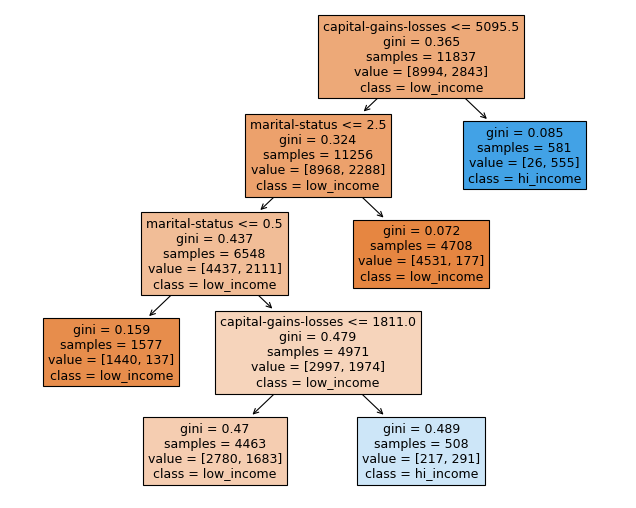

In [19]:
cn = ['low_income', 'hi_income']
displayTree(cart_classifier,cn,X)

Using DisplayCM

[[2187   62]
 [ 511  200]]


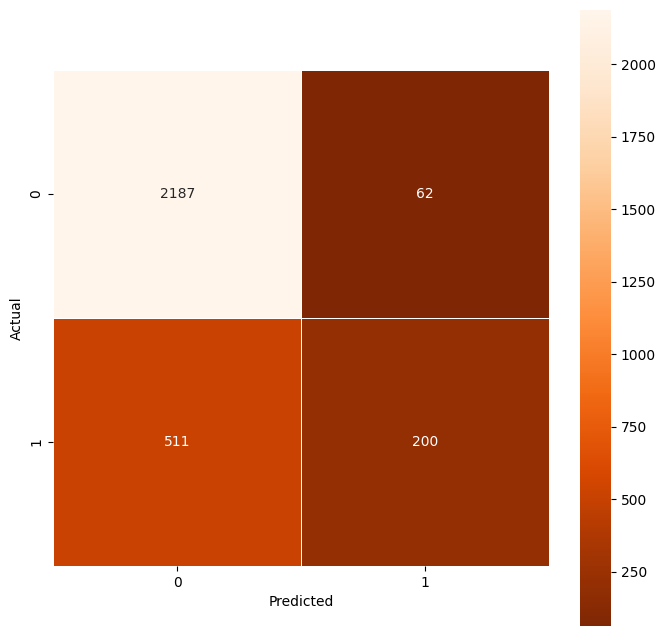

In [27]:
cart_predictions = cart_classifier.predict(X_test)
c5_predictions = c5_classifier.predict(X_test)

displayCM(cart_classifier,X_test,y_test,cart_predictions)

Using compareModels

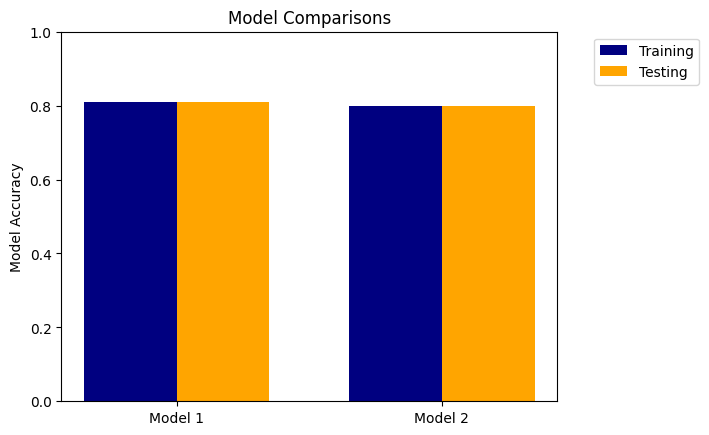

In [30]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

compareModels(score1, score2, score3, score4)

2.Analyze the effect of the parameters max_depth and max_leaf_nodes on classification accuracy. Plot the obtained accuracy values for various choices of max_depth (e.g. 2, 3, 4, none) and max_leaf_nodes (3, 4, 5, none).

In [37]:
#Make the models with different values for max_depth and max_leaf_nodes
test1 = makeDTModel("gini", X_train,y_train, 2, 2, 120)
test2 = makeDTModel("gini", X_train,y_train, 3, 3, 120)
test3 = makeDTModel("gini", X_train,y_train, 4, 4, 120)
test4 = makeDTModel("gini", X_train,y_train, 5, 5, 120)

max_depth = 2 & max_leaf_nodes = 2
[[2238   11]
 [ 583  128]]
max_depth = 3 & max_leaf_nodes = 3
[[2238   11]
 [ 583  128]]
max_depth = 4 & max_leaf_nodes = 4
[[2238   11]
 [ 583  128]]
max_depth = 5 & max_leaf_nodes = 5
[[2187   62]
 [ 511  200]]


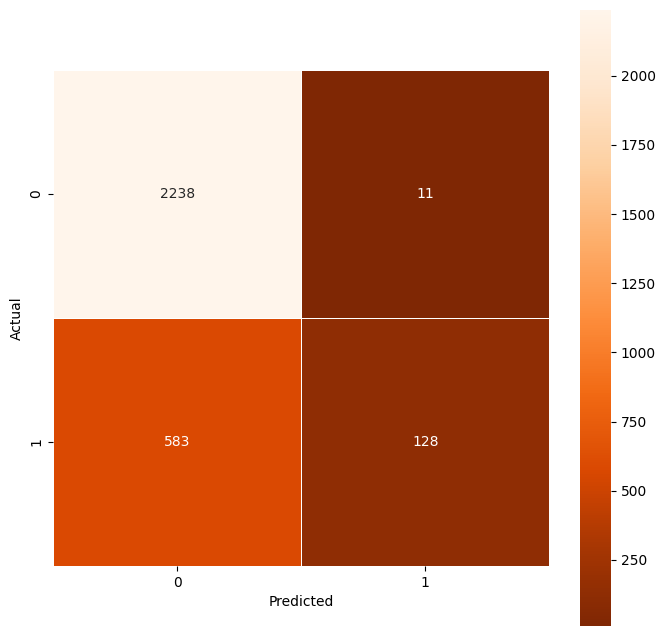

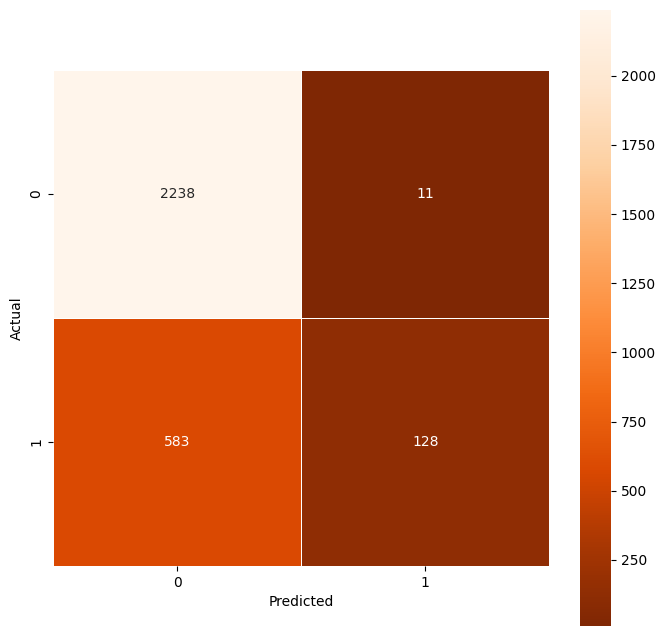

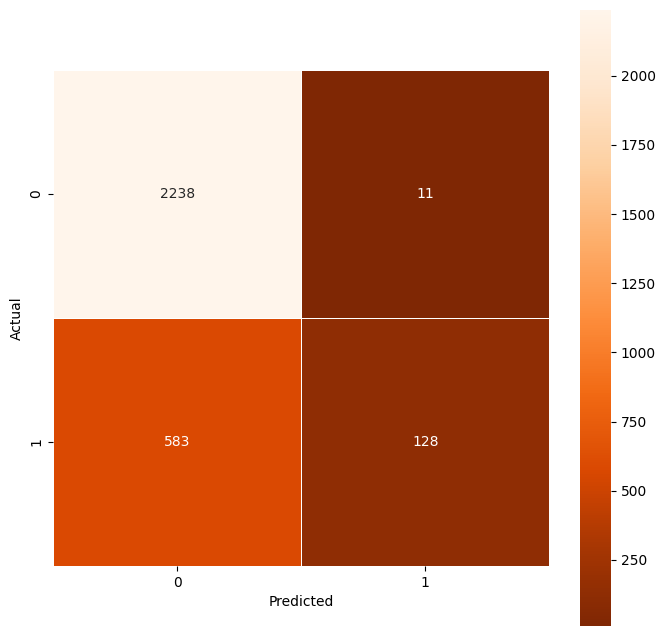

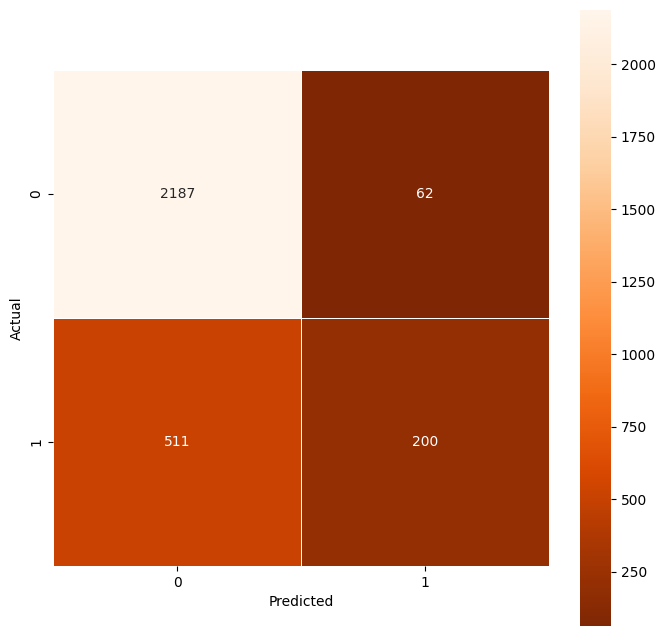

In [39]:
test1_predictions = test1.predict(X_test)
test2_predictions = test2.predict(X_test)
test3_predictions = test3.predict(X_test)
test4_predictions = test4.predict(X_test)

print("max_depth = 2 & max_leaf_nodes = 2")
displayCM(test1,X_test,y_test,test1_predictions)

print("max_depth = 3 & max_leaf_nodes = 3")
displayCM(test2,X_test,y_test,test2_predictions)

print("max_depth = 4 & max_leaf_nodes = 4")
displayCM(test3,X_test,y_test,test3_predictions)

print("max_depth = 5 & max_leaf_nodes = 5")
displayCM(test4,X_test,y_test,test4_predictions)

As you can see by the confusion matrices above it would seem that increasing the max leaf nodes and the max depth did not have any change on the model until both values reached 5. At that point the model became more accurate in determining high income and less accurate when determining low income. This is an interesting outcome since it would matter what data point is more important in what you are trying to predict that would determine what values for max leaf nodes and max depth you would use.

3.Summarize your findings.

After completing step one of this assignment I found it very difficult to make generic functions to acomplish the tasks that were asked. What I found is that the functions ended up needing steps from other functions in order to complete the task at hand. This is what caused me to assume that the user of these functions would end up doing some work outside of them in order to create a more realistic workflow for the functions. For example almost all of the functions require the training data in some sort of way and having to calculate that every time would lead to very big argument lists for the functions. This is why I decided to have them be defined for the user since I could see myself using these functions in there current form.